In [2]:
# Relevant Package Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [54]:
#Import Data from cluster.csv
db = pd.read_csv('cluster.csv')

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,True,Ms. Nicole Clarke,True,1974,True,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
1,False,Mr. Jesse Scott,True,1965,True,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
2,True,Mr. Christopher Carter,True,1973,True,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
3,False,Ms. Jennifer Morgan,True,1993,False,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
4,False,Mr. Michael White,True,1989,True,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,True,Ms. Wendy Roberts,False,1988,True,double,4968,2,0,2,...,3,2,4,3,4,5,1,3,4,3
15585,True,Ms. Sonya Smith,False,2000,True,double,4970,3,3,3,...,5,3,5,5,3,1,3,4,4,5
15586,False,Mr. Maxwell Wright,True,1964,True,single,4046,1,1,1,...,3,4,5,4,4,4,4,5,4,4
15587,False,Mr. Gregory Moran,True,1992,False,double,5155,4,3,4,...,5,4,5,5,2,5,4,3,4,5


In [127]:
len(db[db['Year_Birth'].isna()])

195

In [128]:
len(db[db['Year_Birth']>2006])

813

In [55]:
#Import Data from cluster.csv
db = pd.read_csv('cluster.csv')
db[db.duplicated(keep = False)]
db.drop_duplicates(inplace = True)
# Changing NA values to median value of year and converting to int32
db['Year_Birth'] = db['Year_Birth'].fillna(db['Year_Birth'].median()).astype(int).astype(np.int16)
db['RewardPoints'] = db['RewardPoints'].fillna(db['RewardPoints'].median()).astype(np.int16)
# Converting every column that is int64 to int8 for performance issues
db.iloc[:,(db.dtypes=='int64').values] = db.iloc[:,(db.dtypes=='int64').values].astype(np.int8)
# Change longevity y to yes
db['Longevity'] = db['Longevity'].replace('y','yes')
# Churn, Longevity can be boolean for performence issues
db['Longevity']=db['Longevity'].map({'yes': True, 'no': False})
db['Churn']=db['Churn'].map({'churn': True, 'nochurn': False})
db['TypeTravel']=db['TypeTravel'].map({'business': True, 'leisure': False})

#### General Analysis

In [ ]:
def describe(db, stats):
    d = db.describe()
    return d.append(db.reindex(d.columns, axis = 1).agg(stats))

describe(db, ['skew', 'mad', 'kurt']).T

#### Create Gender column

In [56]:
gender=db['Name'].str.split(' ',expand = True,n=1)[0]
db['Gender']=gender
db['Gender']=db['Gender'].map({'Ms.': 'F', 'Mr.': 'M'})

In [64]:
db['Gender'].value_counts()

F    7982
M    7604
Name: Gender, dtype: int64

#### We have some scholar level informations but only for a few people (62)

In [37]:
scholar=db['Name'].str.split(' ',expand = True,n=0)[4]
scholar.value_counts()

MD     20
DDS    17
DVM     8
Jr.     7
PhD     5
II      4
III     1
Name: 4, dtype: int64

In [39]:
db['Age']=2022-db['Year_Birth']

<AxesSubplot:xlabel='Age', ylabel='Count'>

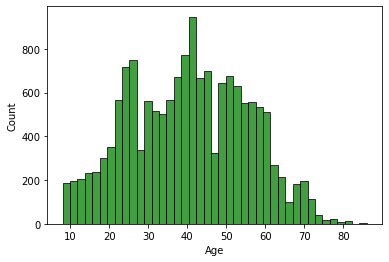

In [40]:
db['Age']=2022-db['Year_Birth']
sns.histplot(db['Age'], color="g")

In [262]:
teste=(db[(db['Age']<10) & (db['RoomType']=='single')])
teste[teste.duplicated(keep = False)]
len(teste)

# small = teste[['Churn','TypeTravel','RoomType']]

# df_dummies = pd.get_dummies(small, drop_first = False)
# df_dummies_corr = df_dummies.corr(method='spearman').applymap(lambda x: 0 if abs(x)<0.2 else x).applymap(lambda x: 0 if abs(x)>0.8 else x)
# sns.heatmap(df_dummies_corr, annot=True, fmt = '.1g')

21

In [261]:
teste=(db[(db['Churn']==False) & (db['Age']>=65)])
len(teste)

330

In [15]:
db.loc[:,'Comfort':'BarService'].mode()

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,3,4,3,3,4,4,4,4,4,4,4,4,4,4


In [17]:
db[db['Wifi']==6]['TypeTravel'].value_counts(normalize=True)

True     0.666667
False    0.333333
Name: TypeTravel, dtype: float64

In [18]:
db[['Wifi','TypeTravel']].value_counts()

Wifi  TypeTravel
4     True          2581
5     True          2399
3     True          2319
2     True          2268
1     True          1157
4     False         1122
5     False         1046
3     False         1028
2     False          977
1     False          635
6     True            24
0     False           12
6     False           12
0     True             6
dtype: int64

#### People who give same value in every category
Only 3: shouldn't be a problem

In [74]:
len(db[db.loc[:,'Comfort':'BarService'].apply(lambda x:min(x)==max(x),1)])

3

In [ ]:
bookme_corr = db.corr(method = 'spearman') # use spearman correlation

# unsupervised learning (k-means) - columns with high correlation (> 0.7 approximately) -> some of them should be removed

figure = plt.figure(figsize=(16,10))
sns.heatmap(bookme_corr, annot=True, fmt = '.1g')

#### Churn and Cleanlines relation

In [46]:
nochurn = db[db['Churn']==False]
nochurn[['Cleanliness']].value_counts(normalize=True)

Cleanliness
4              0.400354
5              0.364012
3              0.111386
2              0.077522
1              0.046726
dtype: float64

<AxesSubplot:>

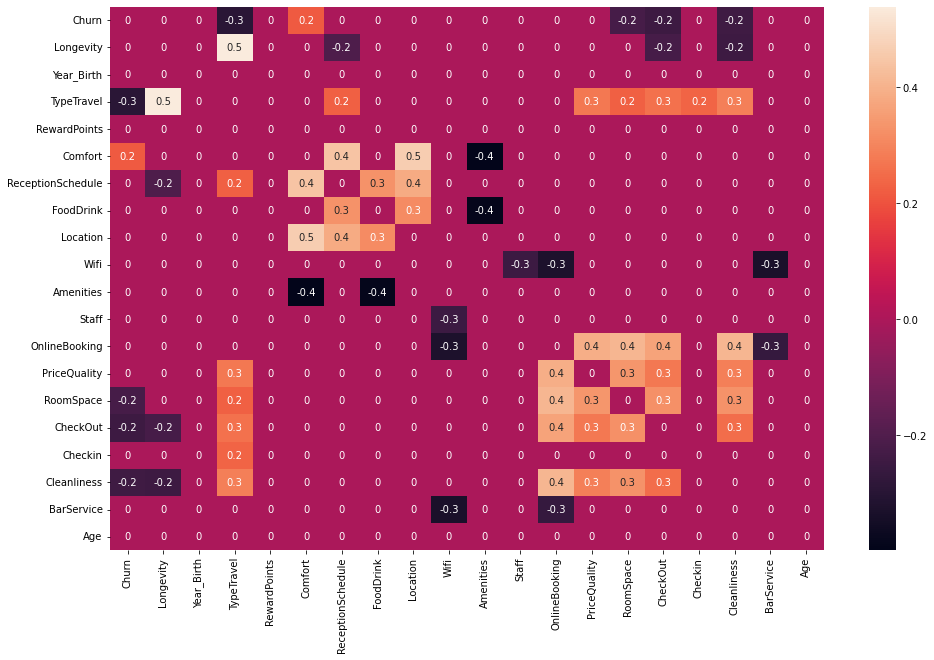

In [268]:
doublerating = (db[db['RoomType']=='single'].corr(method = 'spearman')-db[db['RoomType']=='double'].corr(method = 'spearman')).applymap(lambda x: 0 if abs(x)<0.2 else x)
figure = plt.figure(figsize=(16,10))
sns.heatmap(doublerating, annot=True, fmt = '.1g')

In [289]:
teste=db[db['RoomType']=='double']
teste['Wifi'].mean()

3.1695398204872487

### Churn vs NoChurn
What matters most

In [142]:
churn = db[db['Churn']==True]
nochurn = db[db['Churn']==False]

<AxesSubplot:>

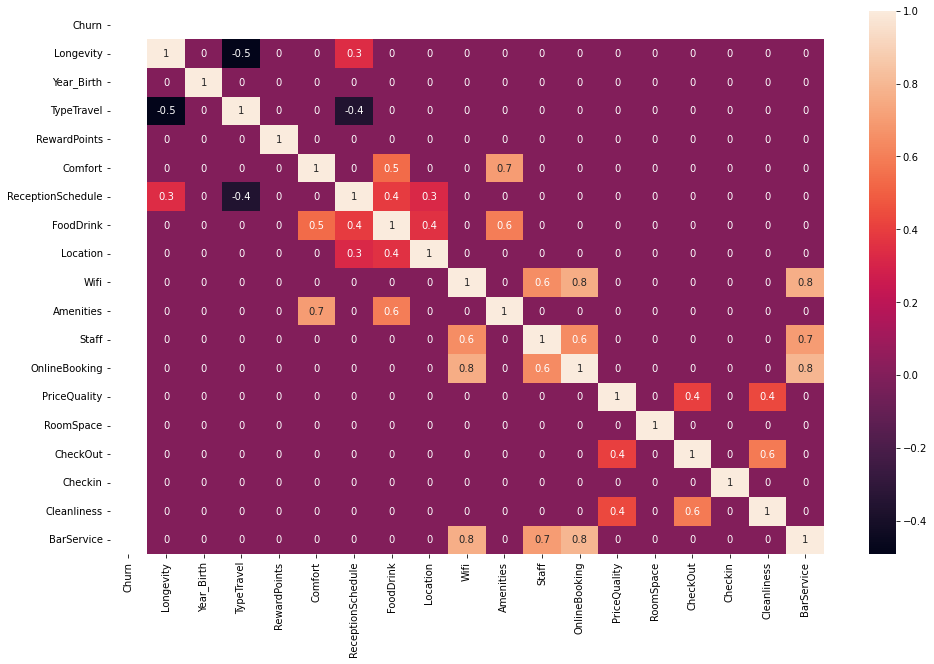

In [112]:
#db['Year_Birth'].corr(db['RoomType'])
nochurncorr = db[db['Churn']==True].corr(method = 'spearman').applymap(lambda x: 0 if abs(x)<0.3 else x)
figure = plt.figure(figsize=(16,10))
sns.heatmap(nochurncorr, annot=True, fmt = '.1g')

##### Code for matrix difference between churn and nochurn

In [ ]:
teste = ((db[db['Churn']==False].corr(method = 'spearman')) - (db[db['Churn']==True].corr(method = 'spearman'))).applymap(lambda x: 0 if abs(x)<=0.2 else x)
figure = plt.figure(figsize=(16,10))
sns.heatmap(teste, annot=True, fmt = '.1g')

### Churn / TypeTravel / RoomType

<AxesSubplot:>

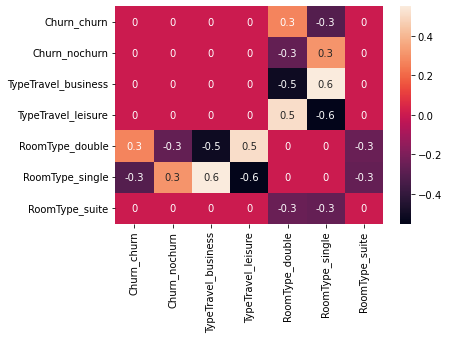

In [154]:
df = pd.read_csv('cluster.csv')
small = df[['Churn','TypeTravel','RoomType']]
df_dummies = pd.get_dummies(small, drop_first = False)
df_dummies_corr = df_dummies.corr(method='spearman').applymap(lambda x: 0 if abs(x)<0.2 else x).applymap(lambda x: 0 if abs(x)>0.8 else x)
sns.heatmap(df_dummies_corr, annot=True, fmt = '.1g')

<AxesSubplot:>

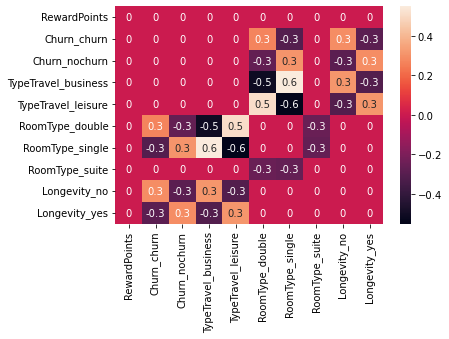

In [176]:
df['Longevity'] = df['Longevity'].replace('y','yes')
small = df[['Churn','TypeTravel','RoomType','RewardPoints','Longevity']]
df_dummies = pd.get_dummies(small, drop_first = False)
df_dummies_corr = df_dummies.corr(method='spearman').applymap(lambda x: 0 if abs(x)<0.2 else x).applymap(lambda x: 0 if abs(x)>0.8 else x)
sns.heatmap(df_dummies_corr, annot=True, fmt = '.1g')

In [ ]:
df = pd.read_csv('cluster.csv')
small = df[['Churn','TypeTravel','RoomType']]
df_dummies = pd.get_dummies(small, drop_first = False)
df_dummies['Rooms']=df_dummies['RoomType_double']+df_dummies['RoomType_single']
df_dummies.drop(['RoomType_double','RoomType_single'],axis=1,inplace = True)
df_dummies_corr = df_dummies.corr(method='spearman')
sns.heatmap(df_dummies_corr, annot=True, fmt = '.1g')

#### Correlations with Gender

<AxesSubplot:>

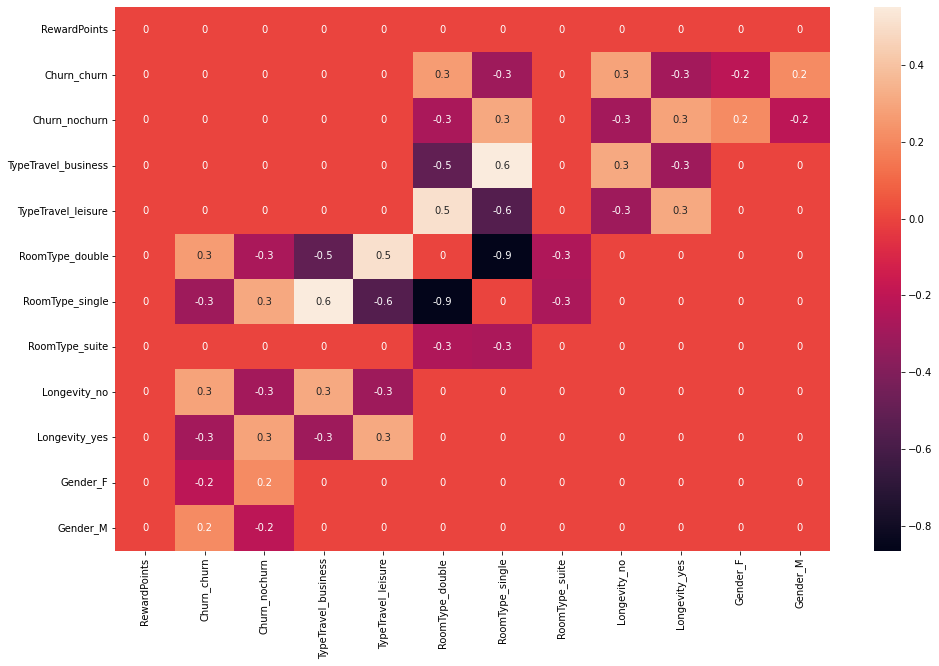

In [62]:
df = pd.read_csv('cluster.csv')
df['Longevity'] = df['Longevity'].replace('y','yes')
gender=df['Name'].str.split(' ',expand = True,n=1)[0]
df['Gender']=gender
df['Gender']=df['Gender'].map({'Ms.': 'F', 'Mr.': 'M'})
small = df[['Churn','TypeTravel','RoomType','RewardPoints','Longevity','Gender']]
# dbnew = db.copy(deep=True)
# dbnew.drop(['Name'],axis=1,inplace = True)
df_dummies = pd.get_dummies(small, drop_first = False)
df_dummies
df_dummies_corr = df_dummies.corr(method='spearman').applymap(lambda x: 0 if abs(x)<0.2 else x).applymap(lambda x: 0 if abs(x)>0.9 else x)
figure = plt.figure(figsize=(16,10))
sns.heatmap(df_dummies_corr, annot=True, fmt = '.1g')

### NoChurn per Type Travel
- Positive: Greater correlation for Business

<AxesSubplot:>

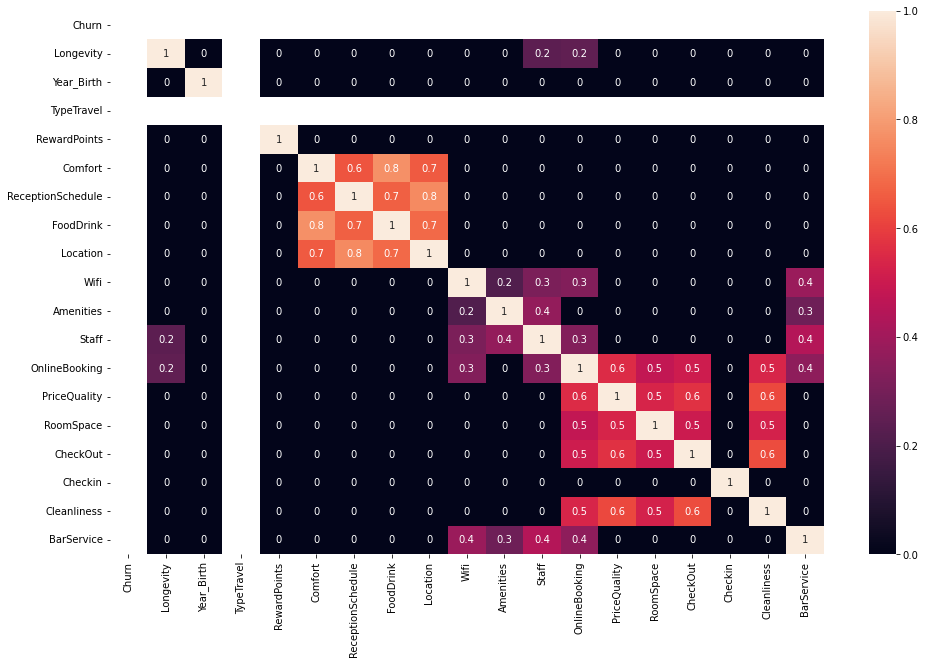

In [106]:
nochurnTypeTravel = ((db[(db['Churn']==False) & (db['TypeTravel']==True)]).corr(method = 'spearman')).applymap(lambda x: 0 if x<=0.2 else x)
figure = plt.figure(figsize=(16,10))
sns.heatmap(nochurnTypeTravel, annot=True, fmt = '.1g')

#### Churn per Type Travel
- Positive: Greater correlation for Business

In [ ]:
churnTypeTravel = ((db[(db['Churn']==True) & (db['TypeTravel']==True)]).corr(method = 'spearman')-(db[(db['Churn']==True) & (db['TypeTravel']==False)]).corr(method = 'spearman')).applymap(lambda x: 0 if abs(x)<=0.2 else x)
figure = plt.figure(figsize=(16,10))
sns.heatmap(churnTypeTravel, annot=True, fmt = '.1g')

#### Exploration

- Longevity with yes, no, y: change y to yes.
- Wifi has values of 6: the percentage of people who choose 6 among leisure/business (31% vs 69%) is in line with the general percentage of leisure/business (33% vs 67%). 0 and 6 are the two less choosen options. The order of prefered choice is the same for leisure and business.
- Changing the data type of Churn, Longevity and TypeTravel in order to correlate with the other variables shows only Churn-Amenities has a correlation greater than abs(0.5) --> value -0.6. Churn also has an abs(0.4) correlation with Staff and OnlineBooking. The other two never pass beyond abs(0.3).
- There are 3 rows that gave the same classification to every aspect (1548, 6707, 15259), two gave all 4 and the other all 5. All roomtype single, business and longevity = yes.




#### To Explore
- From the start, the only Attribute with missing non-null values is Year_Birth. For storytelling purposes, we should discuss how to explore the narrative here for median vs mode vs mean

- Include in storytelling the type of clients that use all 0 or all 5. Also, check the type of clients that use 1 instead of 0, does that make sense? Is check in and Check out necessary?

- Check how many repeat visits do we have from the potential customers. (Name)




































Heatmap Churn/noChurn com leisure/business com RoomType --> Diferencial entre total e parcial
KNN imputer - missing values TODO